In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

In [2]:
env='Hopper-v4'

In [3]:
!echo $PYTHONPATH

/home/daniel/COMPER-GYM-RESULTS


In [4]:
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
#df_comper = df_comper.set_index(["Trial"])

print(df_comper.shape)

(21018, 17)


In [5]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
#df_ddpg = df_ddpg.set_index(["Trial"])
print(df_ddpg.shape)

#/home/daniel/COMPER-GYM-RESULTS/DPPG/data/Ant-v4/train/trial1/progress.json

(20117, 17)


In [6]:
df_comper.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Hopper-v4,25-05-2023 20:40:36,30,0,30,0.001491,1,31,True,50.104430,50.104430,50.104430,50.104430,50.104430,COMPER
1,1,2,Hopper-v4,25-05-2023 20:40:58,53,0,53,0.002634,2,24,True,40.283495,45.193962,45.193962,45.193962,45.193962,COMPER
2,1,3,Hopper-v4,25-05-2023 20:41:22,75,0,75,0.003728,3,23,True,39.118267,43.168730,43.168730,43.168730,43.168730,COMPER
3,1,4,Hopper-v4,25-05-2023 20:41:49,97,0,97,0.004821,4,23,True,38.591414,42.024401,42.024401,42.024401,42.024401,COMPER
4,1,5,Hopper-v4,25-05-2023 20:42:14,118,0,118,0.005865,5,22,True,36.761707,40.971862,40.971862,40.971862,40.971862,COMPER
5,1,6,Hopper-v4,25-05-2023 20:42:44,140,0,140,0.006959,6,23,True,38.337821,40.532856,40.532856,40.532856,40.532856,COMPER
6,1,7,Hopper-v4,25-05-2023 20:43:13,162,0,162,0.008052,7,23,True,38.373198,40.224333,40.224333,40.224333,40.224333,COMPER
7,1,8,Hopper-v4,25-05-2023 20:43:43,185,0,185,0.009195,8,24,True,40.074030,40.205545,40.205545,40.205545,40.205545,COMPER
8,1,9,Hopper-v4,25-05-2023 20:44:00,200,0,200,0.009941,9,16,False,24.633527,38.475321,38.475321,38.475321,38.475321,COMPER
9,1,10,Hopper-v4,25-05-2023 20:44:08,207,0,207,0.010289,9,23,True,39.034282,38.531217,38.531217,38.531217,38.531217,COMPER


In [7]:
df_ddpg.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Hopper-v4,14-06-2023 17:04:00,22,23,0,0.001093,1,23,True,20.963852,20.963852,20.963852,20.963852,20.963852,DDPG
1,1,2,Hopper-v4,14-06-2023 17:04:01,35,36,0,0.001740,2,14,True,8.806367,14.885109,14.885109,14.885109,14.885109,DDPG
2,1,3,Hopper-v4,14-06-2023 17:04:02,46,47,0,0.002286,3,12,True,6.411475,12.060564,12.060564,12.060564,12.060564,DDPG
3,1,4,Hopper-v4,14-06-2023 17:04:03,57,58,0,0.002833,4,12,True,6.709839,10.722883,10.722883,10.722883,10.722883,DDPG
4,1,5,Hopper-v4,14-06-2023 17:04:03,68,69,0,0.003380,5,12,True,6.703273,9.918961,9.918961,9.918961,9.918961,DDPG
5,1,6,Hopper-v4,14-06-2023 17:04:04,78,79,0,0.003877,6,11,True,6.249404,9.307368,9.307368,9.307368,9.307368,DDPG
6,1,7,Hopper-v4,14-06-2023 17:04:05,88,89,0,0.004374,7,11,True,5.719984,8.794885,8.794885,8.794885,8.794885,DDPG
7,1,8,Hopper-v4,14-06-2023 17:04:06,98,99,0,0.004871,8,11,True,5.258766,8.352870,8.352870,8.352870,8.352870,DDPG
8,1,9,Hopper-v4,14-06-2023 17:04:07,108,109,0,0.005368,9,11,True,5.349715,8.019186,8.019186,8.019186,8.019186,DDPG
9,1,10,Hopper-v4,14-06-2023 17:04:08,118,119,0,0.005865,10,11,True,5.268090,7.744076,7.744076,7.744076,7.744076,DDPG


In [8]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Hopper-v4,25-05-2023 20:40:36,30,0,30,0.001491,1,31,True,50.104430,50.104430,50.104430,50.104430,50.104430,COMPER
1,1,2,Hopper-v4,25-05-2023 20:40:58,53,0,53,0.002634,2,24,True,40.283495,45.193962,45.193962,45.193962,45.193962,COMPER
2,1,3,Hopper-v4,25-05-2023 20:41:22,75,0,75,0.003728,3,23,True,39.118267,43.168730,43.168730,43.168730,43.168730,COMPER
3,1,4,Hopper-v4,25-05-2023 20:41:49,97,0,97,0.004821,4,23,True,38.591414,42.024401,42.024401,42.024401,42.024401,COMPER
4,1,5,Hopper-v4,25-05-2023 20:42:14,118,0,118,0.005865,5,22,True,36.761707,40.971862,40.971862,40.971862,40.971862,COMPER


In [9]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
2699,5,2700,Hopper-v4,15-06-2023 01:52:51,49977,49978,0,0.999,2460,10,True,0.770351,31.352633,1.721068,1.159579,0.448814,DDPG
2700,5,2701,Hopper-v4,15-06-2023 01:52:53,49986,49987,0,0.999,2461,10,True,1.067342,31.341420,1.656175,1.166949,0.515720,DDPG
2701,5,2702,Hopper-v4,15-06-2023 01:52:55,49996,49997,0,0.999,2462,11,True,0.566153,31.330030,1.600221,1.167407,0.543592,DDPG
2702,5,2703,Hopper-v4,15-06-2023 01:52:55,50000,50001,0,0.999,2463,5,True,3.166281,31.319611,1.577666,1.222516,0.782390,DDPG
2703,5,2704,Hopper-v4,15-06-2023 01:52:56,50001,50002,0,0.999,2464,2,True,0.961561,31.308384,1.543972,1.200046,0.813592,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

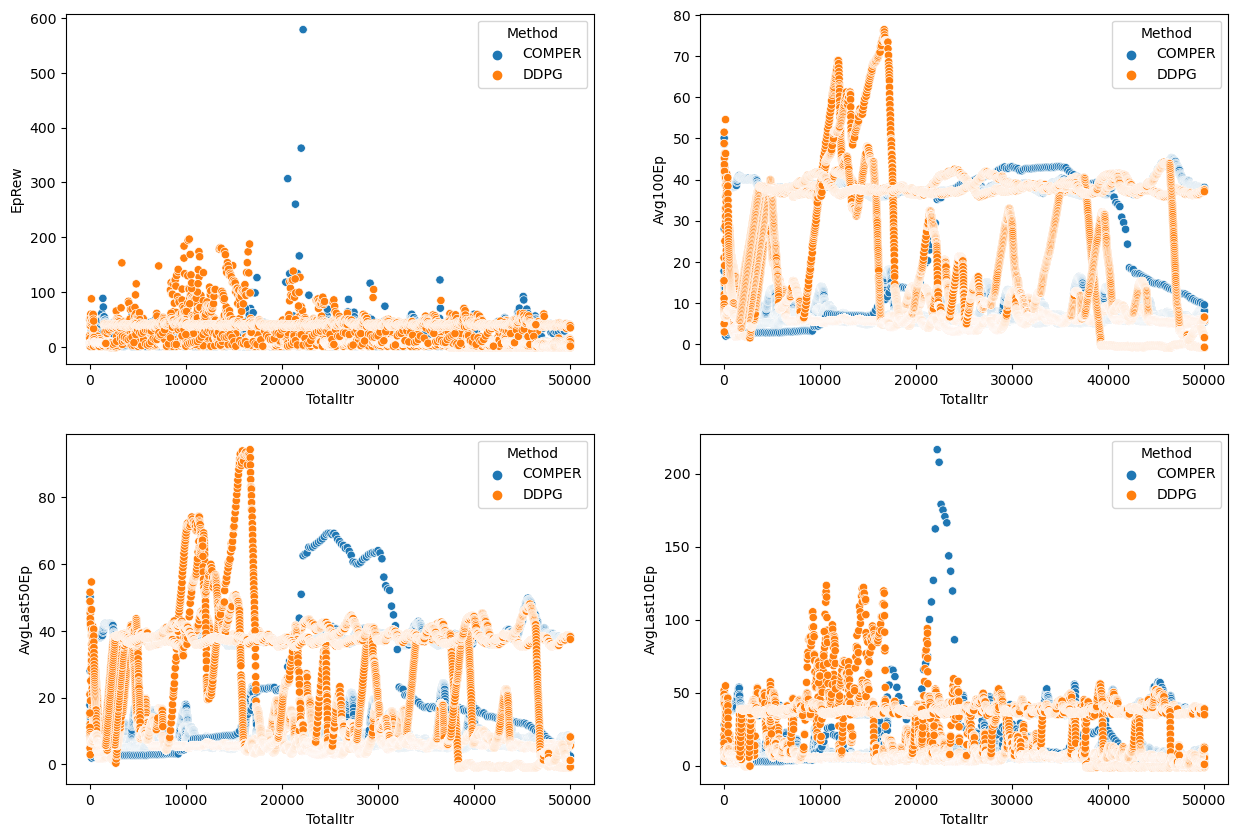

In [10]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.scatterplot(data=df, x="TotalItr", y="EpRew", hue="Method",ax=axs[0][0])
sns.scatterplot(data=df, x="TotalItr", y="Avg100Ep", hue="Method",ax=axs[0][1])
sns.scatterplot(data=df, x="TotalItr", y="AvgLast50Ep", hue="Method",ax=axs[1][0])
sns.scatterplot(data=df, x="TotalItr", y="AvgLast10Ep", hue="Method",ax=axs[1][1])

<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

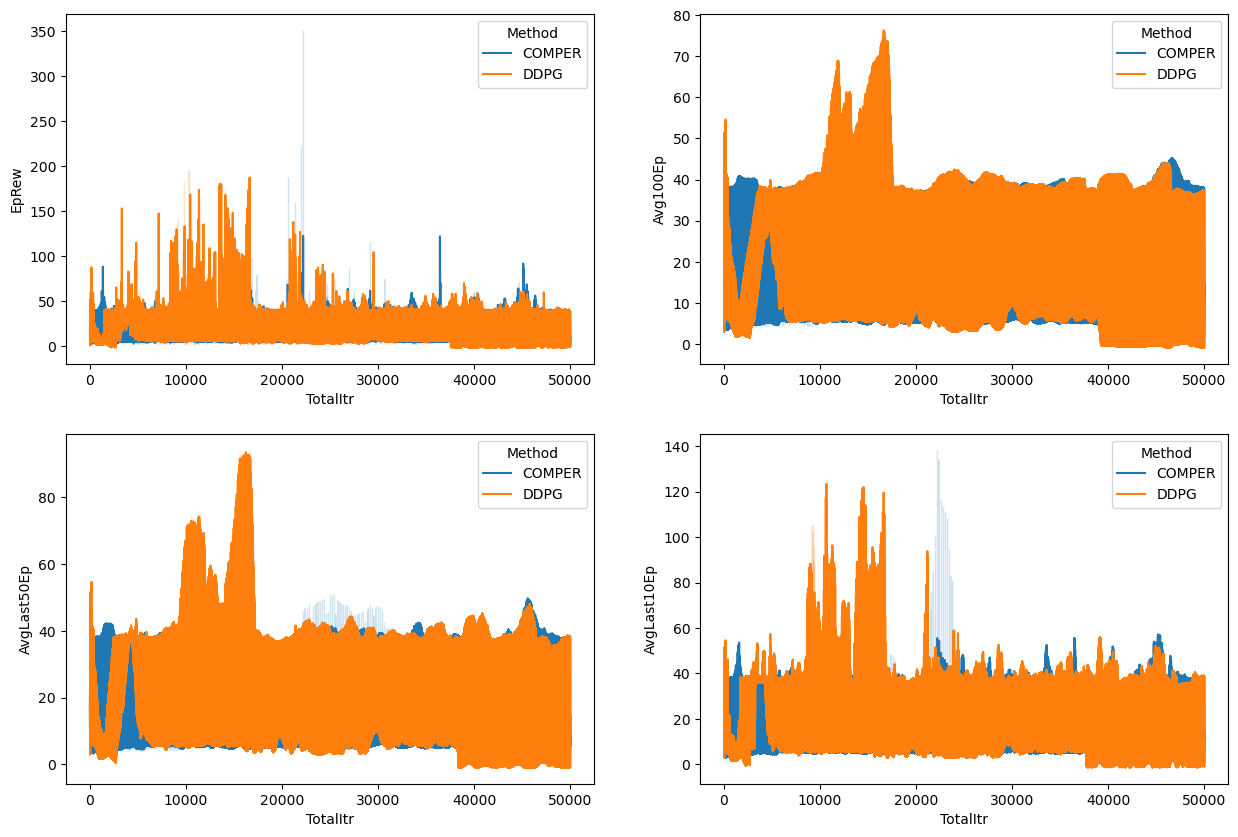

In [11]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])

In [12]:
path ='COMPER_DDPG/data/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
#df_comper_eval=df_comper_eval[df_comper_eval["Trial"]==1]
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,5,24-05-2023 13:41:29,Hopper-v4,5000,2.912140,COMPER
1,5,24-05-2023 15:35:15,Hopper-v4,10000,5.416358,COMPER
2,5,24-05-2023 17:30:46,Hopper-v4,15000,5.068557,COMPER
3,5,24-05-2023 19:29:04,Hopper-v4,20000,4.462292,COMPER
4,5,24-05-2023 21:28:38,Hopper-v4,25000,6.334745,COMPER


In [13]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,4.410603
std,1.428571,14507.211437,1.371775
min,1.000000,5000.000000,2.276021
25%,2.000000,15000.000000,3.524703
50%,3.000000,27500.000000,3.671915
75%,4.000000,40000.000000,6.360790
max,5.000000,50000.000000,6.558020


In [14]:
path ='DPPG/data/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
#df_ddpg_eval=df_ddpg_eval[df_ddpg_eval["Trial"]==1]
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,14-06-2023 17:11:34,Hopper-v4,5000,6.342002,DDPG
1,1,14-06-2023 17:19:44,Hopper-v4,10000,3.508636,DDPG
2,1,14-06-2023 17:28:31,Hopper-v4,15000,3.562925,DDPG
3,1,14-06-2023 17:38:01,Hopper-v4,20000,3.580485,DDPG
4,1,14-06-2023 17:48:13,Hopper-v4,25000,3.516520,DDPG


In [15]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,5.092716
std,1.428571,14507.211437,1.421846
min,1.000000,5000.000000,2.280075
25%,2.000000,15000.000000,3.601104
50%,3.000000,27500.000000,5.795899
75%,4.000000,40000.000000,6.406257
max,5.000000,50000.000000,6.547194


In [16]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

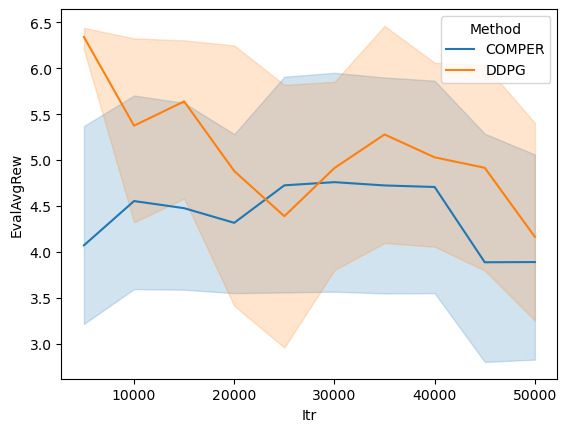

In [17]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')